**PROJECT:In this project, I will build a classification model through Convolutional Neural Networks(CNNs) to predict car images of Nissan, Mercedes-benz, Volkswagen, Porsche, Proton, Toyota, Volvo, Perodua, Tesla, Bmw, Mini, Rolls-royce**


**Business Understanding:Image recognition has many important applications ranging from delivery service, payment processing, and public safety.**

**For example in criminal investigations pivotal questions such as "What kind of car was the suspect driving?" could be the difference between solving a case and not solving case. Application of cameras with high speed image recognition capability at key highway intersections enables to match the car to the model/type and help police find the criminal faster.**

**Join  me on this journey of developing a competitive car image classification model.**
This dataset can also be found on https://www.kaggle.com/datasets/benlaw/car-models-b

**Importing Relevant Libraries**

In [47]:
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,)
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

**Lets have a confirmation of the car names images we have for both our Train and Test data**

In [48]:
train_dir = '/kaggle/input/car-models-b/brand_models_images_b'
labels= os.listdir(train_dir)
labels

['nissan',
 'mercedes-benz',
 'volkswagen',
 'porsche',
 'proton',
 'toyota',
 'volvo',
 'perodua',
 'tesla',
 'bmw',
 'mini',
 'rolls-royce']

**A look at the number of images we have for each type of car in the data**

In [49]:
for label in labels:
    print(label, len(os.listdir(train_dir+'/'+label)))
  

nissan 68
mercedes-benz 226
volkswagen 60
porsche 40
proton 65
toyota 114
volvo 45
perodua 30
tesla 15
bmw 153
mini 25
rolls-royce 25


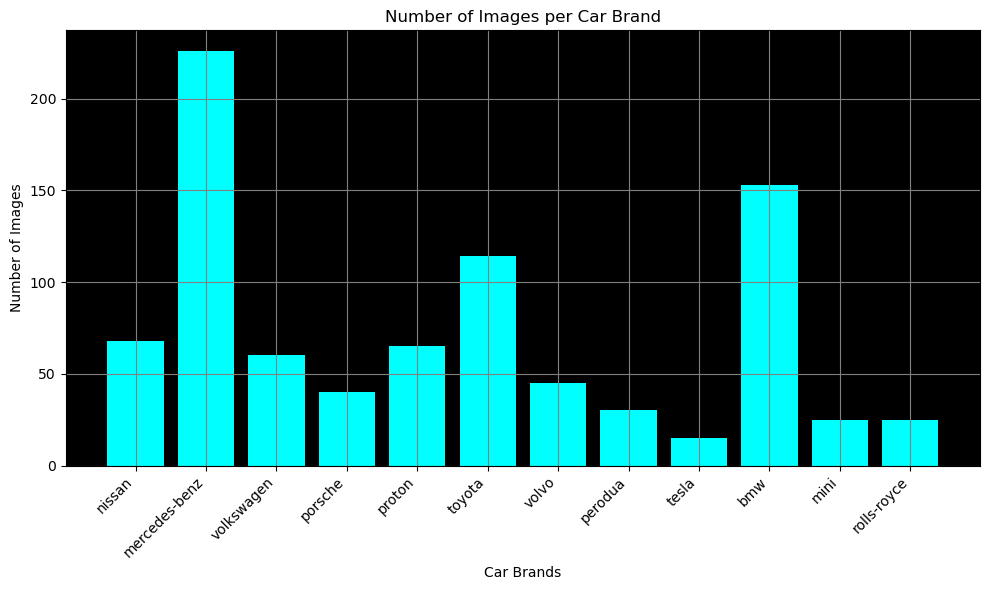

In [50]:
import matplotlib.pyplot as plt

# Data
labels = ["nissan", "mercedes-benz", "volkswagen", "porsche", "proton", "toyota", "volvo", "perodua", "tesla", "bmw", "mini", "rolls-royce"]
image_counts = [68, 226, 60, 40, 65, 114, 45, 30, 15, 153, 25, 25]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(labels, image_counts, color='cyan')
plt.xlabel('Car Brands')
plt.ylabel('Number of Images')
plt.title('Number of Images per Car Brand')
plt.xticks(rotation=45, ha="right")
plt.grid(color='grey')
plt.tight_layout()
plt.gca().set_facecolor('k')
plt.show()

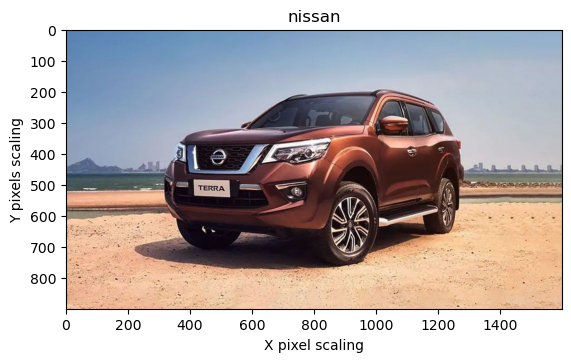

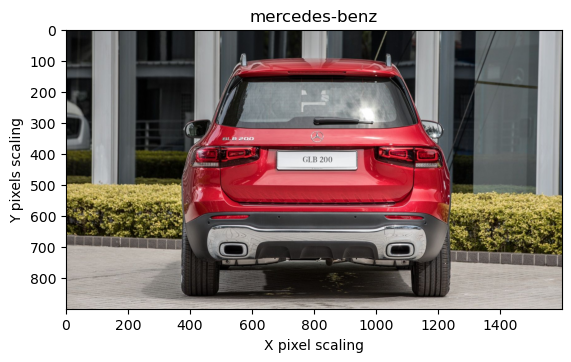

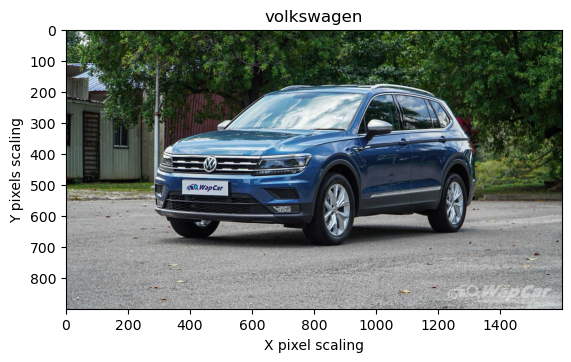

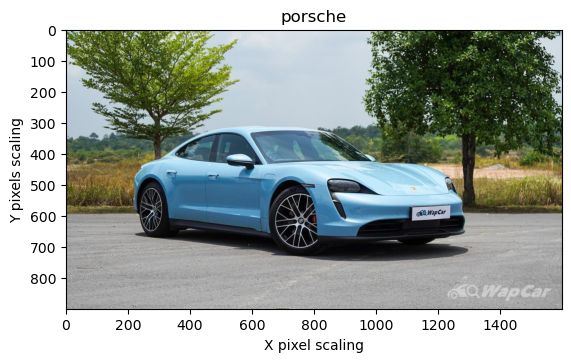

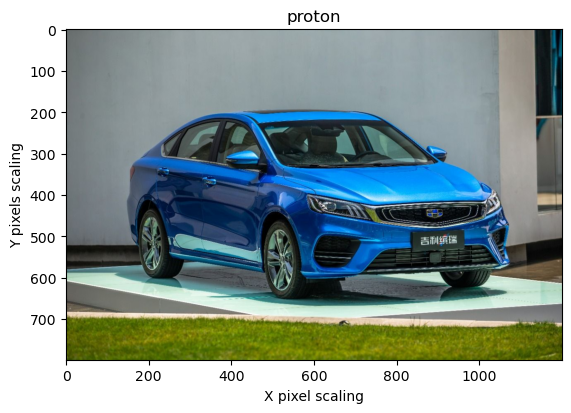

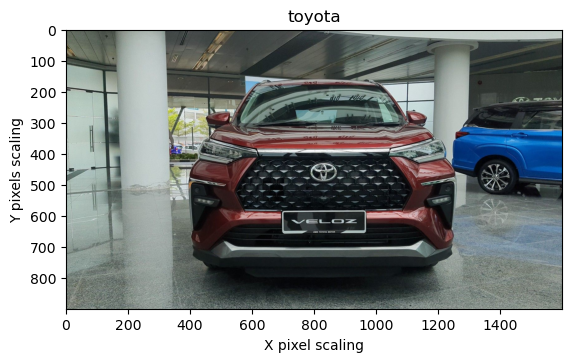

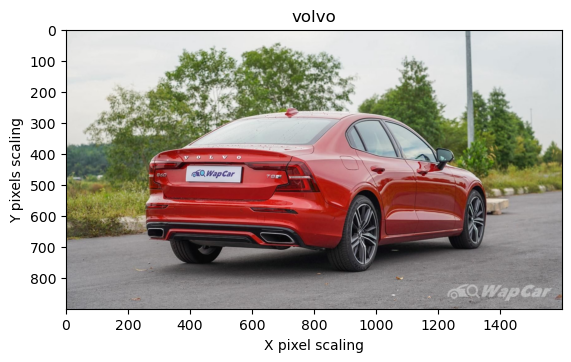

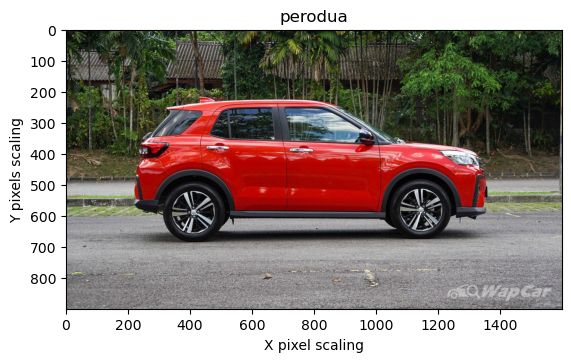

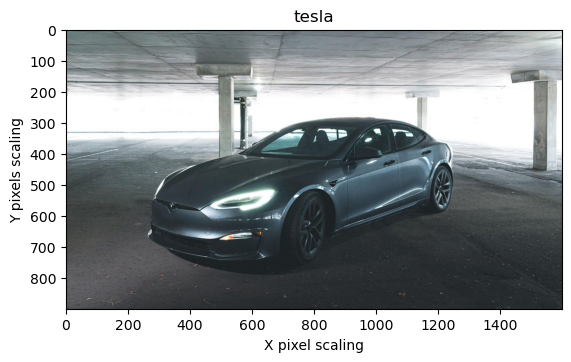

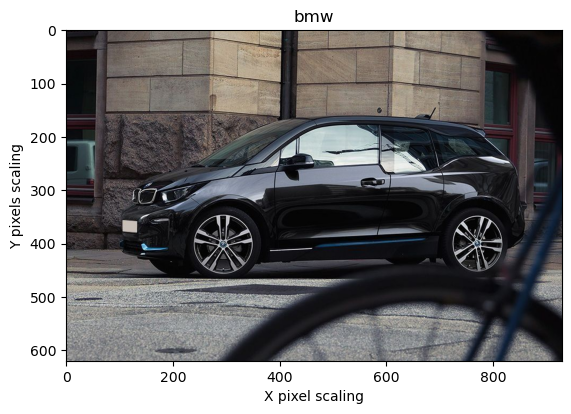

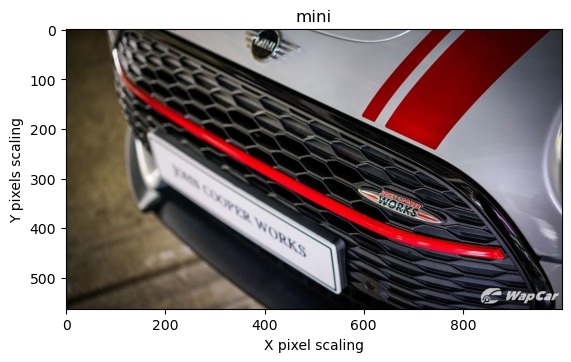

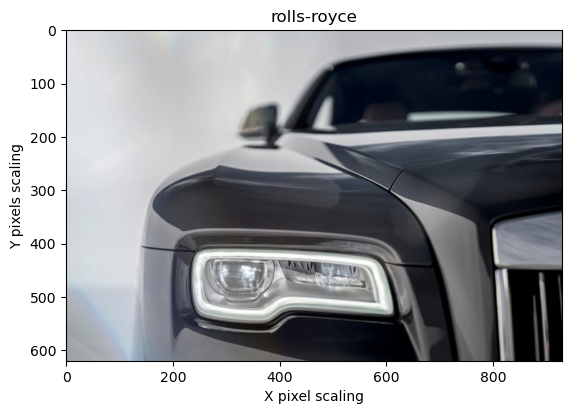

In [51]:
for label in labels:
    path = os.listdir(train_dir + '/' + label)
    img = train_dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

**Here we create a data generator for image augmentation**

In [52]:

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True,  
        vertical_flip=False,
        rescale=1./255,#scale images
        validation_split=0.18) 

In [53]:
# Lets create training set from folders
train_data=datagen.flow_from_directory(train_dir,
                                       target_size=(64,64),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


Found 716 images belonging to 12 classes.


**Creating test data**

In [54]:

test_data=datagen.flow_from_directory(train_dir,
                                       target_size=(64,64),
                                       batch_size=1,
                                       shuffle=False,subset='validation') 

Found 150 images belonging to 12 classes.


**Lets create our Convolutional Nueral Network(CNN) model.
 CNNs are designed to automatically learn and extract features from spatial data using convolutional layers and pooling layers. CNNs are especially effective for tasks where the spatial arrangement of the input data (e.g., pixels in an image) is important for making predictions. In this case of the cars image data the spatial arrangement  refers to how the individual pixels are organized in rows and columns to form the image.**

In [55]:

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(64,64, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.18))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=12, activation="softmax"))

**Defining our model**

In [56]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=55,
    verbose=2,
)

Epoch 1/55
23/23 - 17s - loss: 0.6528 - binary_accuracy: 0.8870 - val_loss: 0.7670 - val_binary_accuracy: 0.9167 - 17s/epoch - 723ms/step
Epoch 2/55
23/23 - 16s - loss: 0.3399 - binary_accuracy: 0.8969 - val_loss: 0.8289 - val_binary_accuracy: 0.9167 - 16s/epoch - 692ms/step
Epoch 3/55
23/23 - 16s - loss: 0.3142 - binary_accuracy: 0.9019 - val_loss: 0.8373 - val_binary_accuracy: 0.9167 - 16s/epoch - 683ms/step
Epoch 4/55
23/23 - 15s - loss: 0.2963 - binary_accuracy: 0.9037 - val_loss: 0.8176 - val_binary_accuracy: 0.9167 - 15s/epoch - 660ms/step
Epoch 5/55
23/23 - 14s - loss: 0.2824 - binary_accuracy: 0.9055 - val_loss: 0.7821 - val_binary_accuracy: 0.9167 - 14s/epoch - 595ms/step
Epoch 6/55
23/23 - 14s - loss: 0.2767 - binary_accuracy: 0.9095 - val_loss: 0.7520 - val_binary_accuracy: 0.9167 - 14s/epoch - 598ms/step
Epoch 7/55
23/23 - 14s - loss: 0.2721 - binary_accuracy: 0.9097 - val_loss: 0.7076 - val_binary_accuracy: 0.9167 - 14s/epoch - 600ms/step
Epoch 8/55
23/23 - 13s - loss: 0.2

Text(0.5, 0, 'epoch')

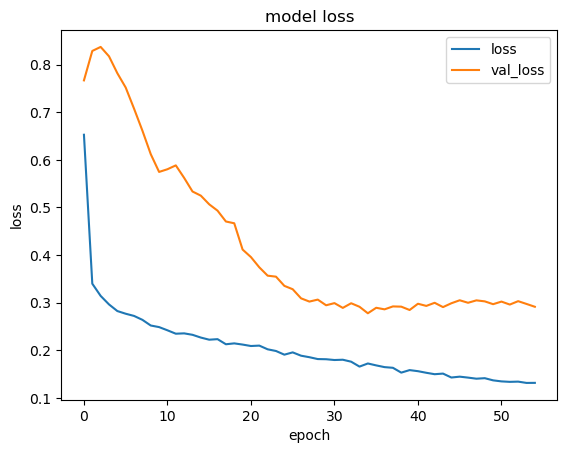

In [57]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')





**DATA VISUALIZATION OF OUR MODEL**

Text(0.5, 0, 'epoch')

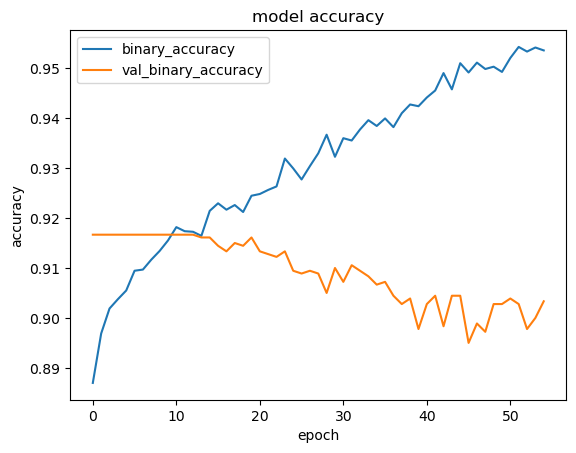

In [58]:
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')



In [59]:
loss,accuracy=model.evaluate(test_data)

150/150 [==============================] - 2s 12ms/step - loss: 0.2999 - binary_accuracy: 0.8972


**The classifier model has a prediction classification accuracy  of 90% which is not bad.** 

**Let me save and give the  model  a name "eagle" in relation to its vision for classifying the given spectrum of cars**

In [ ]:
tf.keras.models.save_model(model,'my_eagle_model.hdf5')